## My Vacations will begin on July 1st and will end on July 10th

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measures = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#A look at the columns of each table
inspector = inspect(engine)


In [11]:
columns1 = inspector.get_columns("measurement")
columns2 = inspector.get_columns("station")

In [12]:
m = pd.DataFrame(columns1)
s = pd.DataFrame(columns2)

m

,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0


In [13]:
s

,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


# Exploratory Climate Analysis

In [49]:
#Query to get last 12 months
session.query(Measures.date,func.avg(Measures.prcp)).group_by(func.strftime("%Y,%m",Measures.date)).\
order_by(Measures.date.desc()).limit(12).all()

[('2017-08-01', 0.06395061728395063),
 ('2017-07-01', 0.13477272727272727),
 ('2017-06-01', 0.11999999999999998),
 ('2017-05-01', 0.15131736526946113),
 ('2017-04-01', 0.32111111111111107),
 ('2017-03-01', 0.17526627218934915),
 ('2017-02-01', 0.24111111111111108),
 ('2017-01-01', 0.07029411764705881),
 ('2016-12-01', 0.19949438202247183),
 ('2016-11-01', 0.12023391812865496),
 ('2016-10-01', 0.12162011173184357),
 ('2016-09-01', 0.285549132947977)]

In [15]:
# Calculate the date 1 year ago from the last data point in the database
lastdate = dt.date(2017,8,23)
date_year_ago = lastdate - dt.timedelta(days=365)

print(f"One year ago from the last date, it was: {date_year_ago}")

One year ago from the last date, it was: 2016-08-23


In [16]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measures.date, Measures.prcp).\
    order_by(Measures.date.desc()).all()

precipitation

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_prcp = pd.DataFrame(precipitation, columns=["Date", "Precipitation"])
df_prcp.set_index("Date", inplace = True)
df_prcp = df_prcp.loc["2017-08-23":"2016-08-23"]

# Sort the dataframe by date
df_prcp.sort_values(by=["Date"],inplace=True, ascending=True)

df_prcp

,Precipitation
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


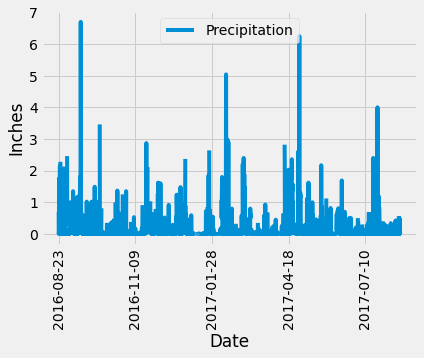

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
df_prcp.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measures.station, func.count(Measures.station)).group_by(Measures.station)\
    .order_by(func.count(Measures.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
print(f"The station with more rows is USC00519281.")

The station with more rows is USC00519281.


In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#Do I have to join Measures and Station??

tempmax = session.query(func.max(Measures.tobs).filter(Measures.station == "USC00519281")).scalar()
tempmin = session.query(func.min(Measures.tobs).filter(Measures.station == "USC00519281")).scalar()
tempavg = session.query(func.avg(Measures.tobs).filter(Measures.station == "USC00519281")).scalar()

print(f"The highest recorded temperature is {tempmax}")
print(f"The lowest recorded temperature is {tempmin}")
print(f"The average recorded temperature is {tempavg}")

The highest recorded temperature is 85.0
The lowest recorded temperature is 54.0
The average recorded temperature is 71.66378066378067


In [50]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

qry = session.query(Measures.date, Measures.tobs).filter(Measures.station == "USC00519281").\
    group_by(func.strftime("%Y,%m",Measures.date)).order_by(Measures.date.desc()).limit(12).all()

qry

[('2017-08-04', 77.0),
 ('2017-07-01', 79.0),
 ('2017-06-01', 80.0),
 ('2017-05-01', 65.0),
 ('2017-04-01', 74.0),
 ('2017-03-01', 71.0),
 ('2017-02-01', 68.0),
 ('2017-01-01', 72.0),
 ('2016-12-01', 74.0),
 ('2016-11-01', 74.0),
 ('2016-10-01', 77.0),
 ('2016-09-01', 80.0)]

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
